# Calculating Fraction of Molecular Collisions that Lead to Reactions #


CBE 60535, University of Notre Dame

Problem 3.4 ( pg. 99 ) from Elements of Chemical Reaction Engineering by H. Scott Fogler, Fifth edition, 2016, ISBN: 978-0-13-388751-8.


Prepared by:

Yun Young Choi ychoi3@nd.edu

Bingxin Yang byang3@nd.edu

## Learning Objectives:

After completing this assignment, you should be able to:


*   Apply integration techniques to Ordinary Differential Equations using Python
*   Plot multiple data on a single graph






## Intended Audience:

This problem is intended for undergraduate students in Chemical and Biomolecular Engineering students from the University of Notre Dame who have taken Chemical Reaction Engineering.

**Useful links to review library:**

1. Plotting with matplotlib

    https://ndcbe.github.io/data-and-computing/notebooks/01/Matplotlib.html?highlight=plot

2. Documentation for scipy.integrate

    https://docs.scipy.org/doc/scipy/tutorial/integrate.html

3. Midpoint Rule

    https://ndcbe.github.io/data-and-computing/notebooks/07/Intro-and-Newton-Cotes.html#midpoint-rule

4. Trapezoid Rule with Multiple Pieces
    https://ndcbe.github.io/data-and-computing/notebooks/07/Intro-and-Newton-Cotes.html#trapezoid-rule-with-multiple-pieces



## Problem Statement:
To undergo a reaction, molecules must collide and overcome a certain activation energy. Whether or not the collision will overcome the activation energy depends on the relative velocities of the molecules involved. Our goal is to calculate the fraction of molecular collisions with enough energy to overcome the activation energy and undergo a reaction.

For reactions in the gas phase, we know the relative velocity of each molecule, $U$. We also know the Maxwell-Boltzmann distribution, $f(U, T)$, which estimates the relative velocities of gas molecules at a given temperature.

\begin{equation}
f(U,T) = 4π(\frac{m}{2πk_BT})^{3/2}exp(\frac{-mU^2}{2k_BT})U^2....(Eq.1)
\end{equation}

$K_B$ = Boltzmann's constant = 3.29 E-24 (cal/molecule/$K$)

$m$ = Reduced mass $(g)$

$U$ = Relative velocity $(m/s)$

$T$= Absolute Temperature $(K)$

$e$ = Energy (kcal/molecule)

$E$ = Kinetic energy (kcal/mol)


Since we are comparing the energy of a collision to activation energy, it is useful to rewrite the Maxwell-Boltzmann distribution in terms of energy. Equation 2 describes the relationship between kinetic energy and velocity and can be substituted into the $f(U, T)$.

\begin{equation}
e = \frac{1}{2}mU^{2}....(Eq.2)
\end{equation}

After substitution, the Maxwell Boltzmann probability distribution of collision with energy $e$ $(cal/molecule)$ at temperature $T$ becomes

\begin{equation}
f(e,T) = 2π(\frac{1}{πk_BT})^{3/2}e^{1/2}exp(\frac{-e}{k_BT})....(Eq. 3)
\end{equation}

In terms of energy per mole, $E$, instead of energy per molecule, $e$ ,we have:

\begin{equation}
f(E,T) = 2π(\frac{1}{πRT})^{3/2}E^{1/2}exp(\frac{-E}{RT})....(Eq.4)
\end{equation}

where $E$ is in $(cal/mol)$, $R$ is in $(cal/mol/K)$, and $f(E,T)$ is in $(mol/cal)$.

The distribution function $f(E,T)$ is easiest to interpret when it is integrated. Integrating $f(E,T)$ over an energy interval $dE$ is the **Fraction of Collisions** with energies between $E$ and $E + dE$, as shown in Equation 5.

\begin{equation}
\int_{E}^{E + dE} f(E,T)dE....(Eq.5)
\end{equation}



## Import Libraries:

In [4]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from matplotlib.patches import Polygon

## 1. Visualizing Fraction of Collisions that Lead to Reactions

Plot the fraction of collisions that lead to reactons versus energy per mole from 0 to 30 $kcal/mol$ for different given temperatures (T = 300, 500, 800 and 1200K).

*Hint: use Equation 4 to get the distribution of collisions that react as a function of energy per mole*


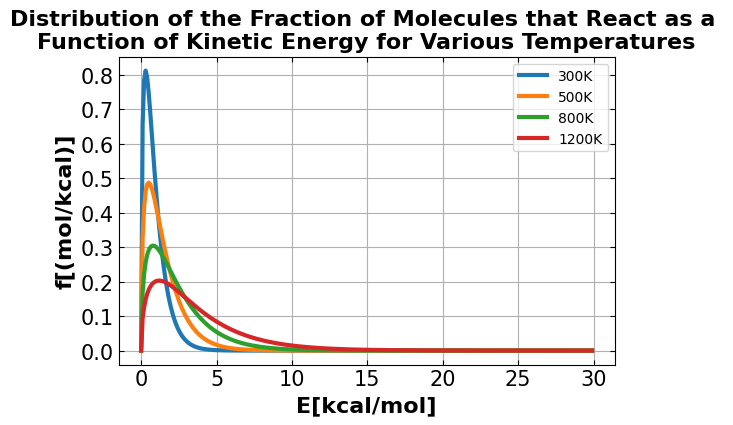

In [5]:
# Gas constant needs to be converted into cal/k mol
R = 8.314*0.000239

# Generate an array of temperatures for calculation based on the requirements
T = np.array([300,500,800,1200]) #unit: K
# Create an empty list to store fraction of collisions
F = []

pi = math.pi

plt.figure(figsize=(6.4,4), dpi=100) #Plot figure size 6.4x4 with 300 DPi

#add your solution here
### BEGIN SOLUTION

# Create a for loop for fraction of collisions calculation at different temperatures from 0 to 30 kcal/mol
for i in range(len(T)):
  E = np.arange(0,30,.1)  # range for x-axis
  F = 2*pi*(1/(pi*R*T[i]))**1.5*E**0.5*np.exp(-E/(R*T[i]))
  plt.plot(E,F,linewidth=3, label=str(T[i])+"K")

### END SOLUTION

# Plot
plt.xticks(fontsize=15) #Tick font size 15
plt.yticks(fontsize=15)
plt.tick_params(direction="in",top=True, right=True) #Major tick direction: in
#plt.tick_params(which="minor",direction="in",top=True, right=True) #minor tick will make the graph look crowded, so left out
plt.grid()
plt.xlabel('E[kcal/mol]', fontsize=16, fontweight = 'bold') #axis label font size: 16, bold
plt.ylabel('f[(mol/kcal)]', fontsize=16, fontweight = 'bold') #axis label font size: 16, bold
plt.legend()
plt.title("Distribution of the Fraction of Molecules that React as a \nFunction of Kinetic Energy for Various Temperatures", fontsize=16, fontweight = 'bold')
plt.show()

**Discussion:** Explain how the fraction of collisions that lead to reactions change as a function of temperature.

**Answer**: For a given activation energy, the higher temperature systems will always have a higher fraction of collisions that overcome the activation energy because their distribution is skewed towards larger energies. For example, if the activation were 5 kcal/mol, the integral from 5 kcal/mol to infinity would be the largest for the higher temperatures and lowest for the lower temperatures.

## 2. Determining the Fraction of Molecules
Write a function that takes in an array of temperatures, a lower bound of integration (activation energy), and an upper bound of integration (infinity unless given) and returns the fraction of collisions that can overcome an activation energy.

*Hint: use integrate.quad. Look up documentation to see its output*

In [6]:
# Regenerate an array of temperatures for calculation based on the requirements

# Define a function for fraction of molecules that have sufficient energy to pass over an energy barrier calculation
def fraction(T, low, upp):
  """Using integration to calculate the fraction of molecules from 0 to 25 kcal
    Args:
        T: array of temperatures (K)
        low: lower bound of integration (minimum energy barrier)
        upp: upper bound of integration (infinity or a given value)
        E: Energy (per mole)
    Returns:
        f: f(E,T), distribution of collision for energy per mole (mol/cal)
    """

  # Store fraction of molecules that have sufficient energy to pass over an energy barrier equal to low
  f = []

  # Add your solution here
  ### BEGIN SOLUTION
  # Create a for loop for integration calculation at different temperatures
  for i in range(len(T)):
    result,error = integrate.quad(lambda E: 2*pi*(1/(pi*R*T[i]))**1.5*E**0.5*np.exp(-E/(R*T[i])),low,upp)
    f.append(result)

  ### END SOLUTION

  return f

What is the fraction of molecules that have sufficient energy to pass over an energy barrier of 25 kcal at 300, 500, 800 and 1200K? Print your results.

*Hint: integrate $f(E,T)$ from 25 to infinity (100 is sufficiently large) using function defined above*

In [7]:
# calculate fraction of molecules
frac = fraction(T, 25, 100)

# print fraction of molecules for each T
print("Fraction of Molecules with Sufficient Energy to Overcome an Energy Barrier of 25 kcal/mol")
for i in range(len(T)):
    print("{} K: {}".format(T[i], frac[i]))

Fraction of Molecules with Sufficient Energy to Overcome an Energy Barrier of 25 kcal/mol
300 K: 4.5214316303312536e-18
500 K: 6.808923611608622e-11
800 K: 6.821634331731523e-07
1200 K: 0.00010684065902266493


**Discussion**: what can we see about the relationship between temperature and fraction of molecules that can overcome an arbitrary activation energy?

**Answer**: we can see that as temperature increases, the fraction of molecules that overcome the activation energy increases

## 3. Calculating the Ratio of the Fraction of Molecules that React
Calculate the fraction of molecules that react between 0 and 25 kcal/mol for 300 K and 1200 K. Store your results in a list called $I$.


In [8]:
# Define Temperature in a list T1 (300K and 1200K)
T1 = np.array([300,1200])

# Store the fraction from the integration in I to obtain the fraction at given temperatures
# Create an empty list I2
I = []
# Add your solution here
### BEGIN SOLUTION

I = fraction(T1, 0, 25)

### END SOLUTION

# print data
print("Fraction of Collisions that React with Barrier Height between 0-25 kcal/mol from 300 K to 1200 K: \n", I)

Fraction of Collisions that React with Barrier Height between 0-25 kcal/mol from 300 K to 1200 K: 
 [0.9999999999999933, 0.9998931593409495]


Now, obtain the ratio using the `I` obtained above comparing 300 K to 1200 K.

In [9]:
#Add your solution here that will calculate and show the ratio here
### BEGIN SOLUTION
R = I[0]//I[1]

### END SOLUTION

# print the obtained ratio
print("Baseline resistance = {0:0.4f}".format(R))

Baseline resistance = 1.0000


### Additional Analysis

As mentioned above, The distribution function $f(E,T)$ is most easily interpreted by recognizing that integrating $f(E,T)$ over a change dE is the **Fraction of Collisions** with energies between $E$ and $E + dE$


\begin{equation}
\int_{E}^{E + dE} f(E,T)dE....(Eq.5)
\end{equation}




The **Reaction of Collisions** can be found by setting the lower integration limit equal to activation energy, $E_{A}$, and the upper integration limit to infinity as shown in Equation 6.

\begin{equation}
F(E>E_A,T) = \int_{E_A}^{∞} f(E,T)dE....(Eq.6)
\end{equation}




For $E_{A}$ > 3$RT$, an analytical approximation for the fraction of collision with energies greater than $E_{A}$ can be obtained by integrating Equation 5 from $E_{A}$ to infinity to get:

\begin{equation}
F(E>E_A,T) = (\frac{2}{{π}^{0.5}})(\frac{E_A}{RT})^{1/2}exp(\frac{-E_A}{RT})....(Eq.7)
\end{equation}

## 4. Fraction of Collisions that have Energies Greater Than a Certain Value, $E_A$.

### 4a. Manually integrate Equation 5 from $E_A$ to infinity and to get Equation 7.

*Hint: the constants in the equation can be grouped and substituted with constant such as A and/or B for simplification*

*Hint: use u-substition*

Submit the written work via ***Gradescope***.

### 4b. Numeric Integration

Numerically integrate Equation 5 and evaluate at $E_A$ for $E_A$ ranging from 0 to 40.

In [10]:
# gas constant needs to be converted into cal/k mol
R = 8.314*0.000239

#add solution here

# define energy range from 0 to 40 kcal
E_A = np.arange(.0,40,.1)  # range for x-axis

# temperature
T2 = 700 # units: K

#define equation 7 as F_C
def F_C(E_A, T):
  """Calculating the fraction of collisions
    Args:
        E_A: activation energy (kcal/mol)
        T: temperature (K)
    Returns:
        y: fraction of collisions with energy greater than E_A
    """
  pi = math.pi
  # calculation of fraction of collision
  y = 2*pi*(1/(pi*R*T))**1.5*E_A**0.5*np.exp(-E_A/(R*T))

  return y

### 4c. Visualization:

Graph using the equation you have obtained from 4b for 700K.

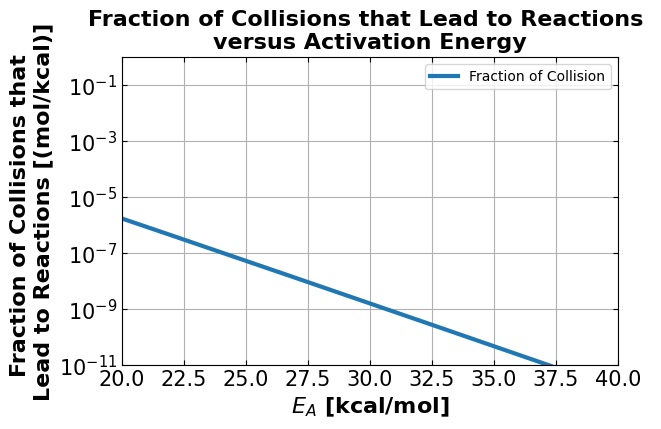

In [11]:
# plot the data
plt.figure(figsize=(6.4,4), dpi=100)
plt.grid()
plt.semilogy(E_A, F_C(E_A,T2), linewidth=3, label="Fraction of Collision")
plt.ylim([10E-12,1])
plt.xlim([20,40])
plt.xticks(fontsize=15) #Tick font size 15
plt.yticks(fontsize=15)
plt.tick_params(direction="in",top=True, right=True) #Major tick direction: in
#plt.tick_params(which="minor",direction="in",top=True, right=True) #minor tick will make the graph look more crowded so is left out
plt.xlabel('$E_A$ [kcal/mol]',fontsize=16, fontweight = 'bold')
plt.ylabel('Fraction of Collisions that \nLead to Reactions [(mol/kcal)]',fontsize=16, fontweight = 'bold')
plt.title('Fraction of Collisions that Lead to Reactions \nversus Activation Energy', fontsize=16, fontweight = 'bold')
plt.legend()
plt.show()

### What does the plot above tell us?

**Answer:** it tells us that as the activation energy increases, the amount of collisions that lead to reactions decreases. The relationship is linear

### 4d. What fraction of collisions have energies greater than $E$ = 25 kcal/mol?

Hint: What is the y axis value when x = 25 kcal?

In [12]:
# Define constants
E_A1 = 25 # unit: kcal

# Call the function F_C and calculate the fraction of collisions at 700K.
### BEGIN SOLUTION
F_C(E_A1,T2)

### END SOLUTION
print("Fraction of collisions have energies greater than E = 25 kcal/mol at 700K: \n",F_C(E_A1,T2),"when E = 25 kcal")

Fraction of collisions have energies greater than E = 25 kcal/mol at 700K: 
 5.37835222623192e-08 when E = 25 kcal


### 4e. Visualization at different temperature:

Graph using the code you have obtained from 4b for 500K.

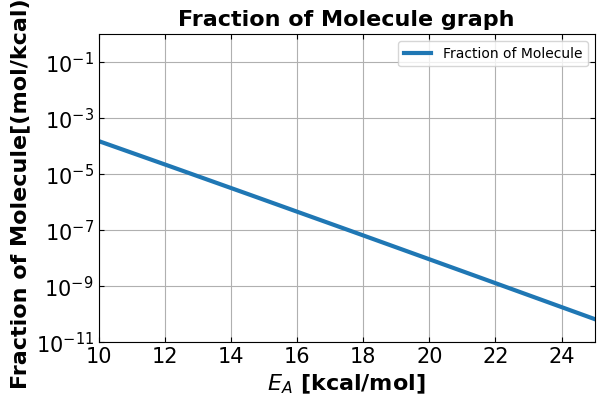

In [13]:
#add your solution here to get the graph shown below
E_A2 = np.arange(0,40,0.01)
# define temperature for this problem
T3 = 500 #unit: K

# Call the funcation and calculate the fraction of collisions and create a semilog plot as shown in 4c.
#Add your solution here
### BEGIN SOLUTION
F_C(E_A2, T3)

#Plot
plt.figure(figsize=(6.4,4), dpi=100)
plt.grid()
plt.semilogy(E_A2, F_C(E_A2,T3), linewidth=3, label="Fraction of Molecule")
plt.xlabel('$E_A$ [kcal/mol]', fontsize=16, fontweight = 'bold')
plt.ylabel('Fraction of Molecule[(mol/kcal)]', fontsize=16, fontweight = 'bold')
plt.title('Fraction of Molecule graph', fontsize=16, fontweight = 'bold')
plt.ylim([10E-12,1])
plt.xlim([10,25])
plt.xticks(fontsize=15) #Tick font size 15
plt.yticks(fontsize=15)
plt.tick_params(direction="in",top=True, right=True) #Major tick direction: in
#plt.tick_params(which="minor",direction="in",top=True, right=True) #minor tick will make the graph look more crowded so is left out
plt.legend()
plt.show()
### END SOLUTION

### 4f. What fraction of molecules have collision energies greater than 15 kcal/mol at 500K?

In [14]:
# Find F_500 when E = 25
### BEGIN SOLUTION
F_C(E_A1, T3)
### END SOLUTION

print("F_500 is",F_C(E_A1, T3),"when E_A = 15")

F_500 is 6.722248169794792e-11 when E_A = 15


In [15]:
# Find F_700 when E = 25
### BEGIN SOLUTION
F_C(E_A1, T2)

### END SOLUTION

print("F_700 is",F_C(E_A1, T2),"when E_A = 15")

F_700 is 5.37835222623192e-08 when E_A = 15


**Discussion:**
Compare fraction of collision that overcome an activation energy of 25 kcal/mol at 500 K and 700 K.

**Answer**:
The fraction of collisions that overcome 25 kcal/mol increases 3 orders of magnitude from 500 K to 700 K.

## 5. Fraction of Collisions at Various Temperatures

### 5a. Graph $f(E > E_A,T)$ versus $T$ for $E_A$ = 3, 10, 25 and 40 kcal/mol. Assume T varies from 1 K to 120 K. Use a semilog plot for the y-axis.


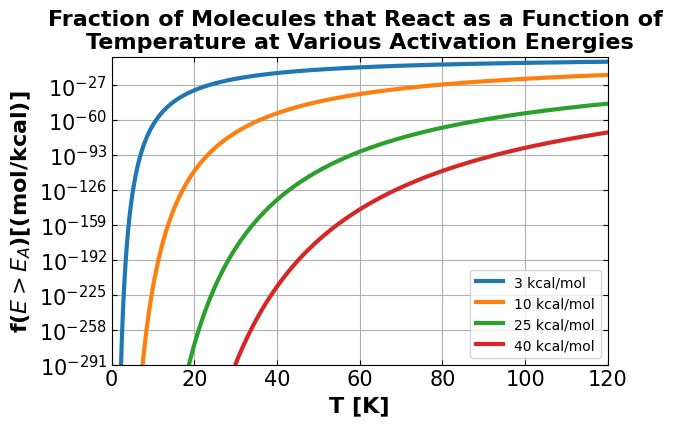

In [16]:
# define constants and data storage
# make a list for fraction storage
F3 = []
# redefine the range of temperature
T4 = np.arange(1,120,0.1) # Unit: K
# make a list for energy
EA3 = [3,10,25,40] #unit: kcal
pi = math.pi

plt.figure(figsize=(6.4,4), dpi=100) #Figure size 4x4 with 300 DPi
# Create a loop for fraction calculation for different temperatures and to graph a semilog graph
# enter equation here
### BEGIN SOLUTION
for i in range(len(EA3)):
  F3 = 2*pi**(-0.5)*((EA3[i]/(R*T4))**0.5)*np.exp(-EA3[i]/(R*T4))
  plt.semilogy(T4, F3, label=str(EA3[i])+" kcal/mol",linewidth=3)
### END SOLUTION

# plot
plt.grid()
plt.ylim([10E-292,1])
plt.xlim([0,120])
plt.xticks(fontsize=15) #Tick font size 15
plt.yticks(fontsize=15)
plt.tick_params(direction="in",top=True, right=True) #Major tick direction: in
#plt.tick_params(which="minor",direction="in",top=True, right=True) #minor tick will make the graph look more crowded so is left out
plt.xlabel('T [K]', fontsize=16, fontweight = 'bold') #axis label font size: 16, bold
plt.ylabel('f($E > E_A$)[(mol/kcal)]', fontsize=16, fontweight = 'bold') #axis label font size: 16, bold
plt.title("Fraction of Molecules that React as a Function of \nTemperature at Various Activation Energies", fontsize=16, fontweight = 'bold')


plt.legend()
plt.show()

**Discussion:** What does the graph above show?

**Answer**: As temperature increases, the fraction of molecules that react increases. Additionally, a lower activation energy leads to a higher fraction of molecules that react. The largest fraction of molecules will react at the highest temperature and with the lowest activation energy.


## 6. Comparing Midpoint Rule to Gass Quadruture

#### Our goal is to determine the amount of segments it takes before midpoint rule is approximately as good of an estimator as Gauss Quadrature.

###6a. By hand, write out the midpoint rule and sketch an image describing the process

**Answer:** I_midpoint = $h*f((a+b)/2)$. For multiple pieces, sum up all the I_midpoints. A picture should show a rectangle (or several) that are centered at a given point and have width b-a.

### 6b. Write a function to numerically integrate the fraction of collisions using the midpoint rule. Evaluate at T = 800 K. Use E between 0 to 15 kcal/mol.
*Hint: this is similar to the midpoint code from the class website and trapezoid rule with multiple pieces. Basically, you are writing the midpoint rule with multiple pieces*


In [17]:
# define and plot function
def midpoint_integration(N, plot = True):
    """
    Args:
        N = the number of rectangles
        plot = a boolean that determines whether to generate plots or return the result of the integration
        *This is useful because for visual purposes, you create a plot. For calculating errors, you will return the
        integration result instead
    Returns:
       Imid = the approximate result of the integral (if !plot)
       OR
       generates a plot of the midpoint rule applied to the distribution of the fraction of collisions (if plot)
    """

    T = 800
    E = np.linspace(0,15,100)

    # update the equation to represent the fraction of collisions
    ### BEGIN SOLUTION ###
    f = lambda E: 2*pi*(1/(pi*R*T))**1.5*E**0.5*np.exp(-E/(R*T))
    ### END SOLUTION ###

    if plot:
      plt.plot(E,f(E),label="f(x)",color="blue")
      ax = plt.gca()

    # bounding a and b, finding width of each rectangle
    far_left = 0
    far_right = 15
    width = (far_right - far_left)/N

    # initializing counter
    Imid = 0

    # create a loop that approximates the integration using midpoint rule
    # hint: a and b must update each iteration. The width between them is constant.
    # hint: calculate the value of the function, plug into Imid formula, and add Imid to an accumulator
    # call the evaluation of the function at (a+b)/2 "mid" for coherence with rectangle drawing code
    ### BEGIN SOLUTION ###
    for i in range(N):
        a = i*width
        b = i*width + width
        mid = f((a + b)/2)
        Imid += width*mid
    ### END SOLUTION

        # draw rectangle
        if plot:
          verts = [(a,0),(a,mid), (b,mid),(b,0)]
          poly = Polygon(verts, facecolor='0.8', edgecolor='k')
          ax.add_patch(poly)

    if plot:
      print("Integral estimate = ",Imid)

    if (plot == False):
      return Imid

    if plot:
      # add labels
      plt.xlabel("x")
      plt.ylabel("f(x)")
      plt.title("Midpoint Rule")
      plt.show()

Integral estimate =  1.0107343121299819


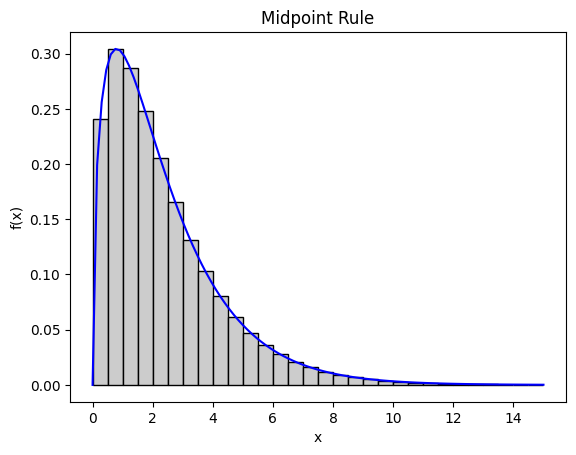

In [18]:
# call function to test
midpoint_integration(30)

### 6c. Use scipy.integrate.quad to evaluate the same equation and bounds as in 6b.
*hint: this will produce an integer*


In [21]:
## finding integral of this function using scipy.integrate.quad
T = 800
result,error = integrate.quad(lambda E: 2*pi*(1/(pi*R*T))**1.5*E**0.5*np.exp(-E/(R*T)),0,15)
print(result)

0.9997094573570767


### 6d. Comparing Midpoint Rule to Gauss Quadrature.

Evaluate the integral using the function from 6b over a range of N (between 1 and 50). This is the "midpoint result". Store the midpoint result in a vector. Next, subtract the Gauss Quadrature result from each midpoint result. Store the difference in a vector called compare.
*hint: cast N[i] as an int*

*hint: set plot = False*

In [24]:
points = 50
N = np.linspace(1, 50, points)
compare = np.zeros(points)

### BEGIN SOLUTION
for i in range(points):
  i = int(i)
  compare[i] = midpoint_integration(int(N[i]), False)
  compare[i] -= result
### END SOLUTION

print(compare)

[-0.79312238 -0.21494489 -0.00351488  0.05427425  0.06668412  0.06553709
  0.06051562  0.05475037  0.0492623   0.04434694  0.04004378  0.03630544
  0.03306072  0.03023791  0.02777264  0.02560982  0.02370324  0.02201446
  0.02051161  0.01916824  0.01796231  0.0168754   0.01589206  0.01499924
  0.01418588  0.01344258  0.01276129  0.01213509  0.011558    0.01102485
  0.01053115  0.01007296  0.00964683  0.00924973  0.00887898  0.00853222
  0.00820733  0.00790246  0.00761591  0.0073462   0.00709197  0.00685202
  0.00662525  0.00641067  0.0062074   0.0060146   0.00583156  0.00565759
  0.00549207  0.00533445]


### 6e. Plotting
Plot compare versus N. Make a publication quality figure.


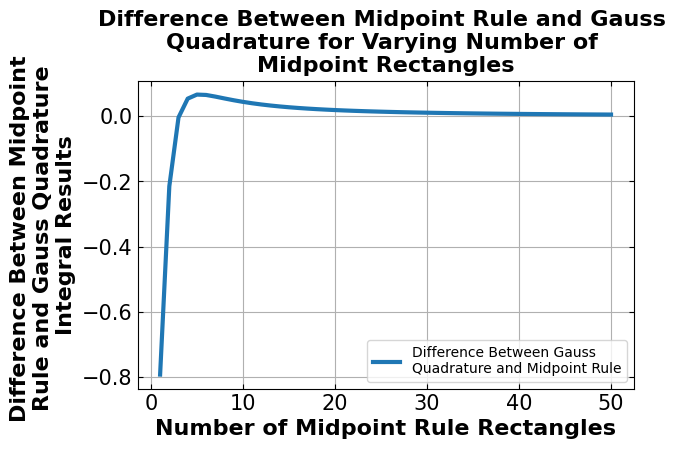

In [35]:
# plot the data
plt.figure(figsize=(6.4,4), dpi=100)
plt.grid()

# write line that plots compare vs N
### BEGIN SOLUTION
plt.plot(N, compare, linewidth=3, label="Difference Between Gauss \nQuadrature and Midpoint Rule")
### END SOLUTION
plt.xticks(fontsize=15) #Tick font size 15
plt.yticks(fontsize=15)
plt.tick_params(direction="in",top=True, right=True) #Major tick direction: in
plt.tick_params(which="minor",direction="in",top=True, right=True) #minor tick direction: in
plt.xlabel('Number of Midpoint Rule Rectangles',fontsize=16, fontweight = 'bold')
plt.ylabel('Difference Between Midpoint \nRule and Gauss Quadrature \nIntegral Results',fontsize=16, fontweight = 'bold')
plt.title('Difference Between Midpoint Rule and Gauss \nQuadrature for Varying Number of \nMidpoint Rectangles', fontsize=16, fontweight = 'bold')
plt.legend()
plt.show()

**Discussion**: What do you notice about the errors? At what value of N are the integral approximations roughly equal?

**Answer**: For N > ~4, the difference approaches 0. The error becomes approximately 0 for N > 30, but for values of N > 10 is probably small enough.